### 1. Problem Formulation

From the company's monthly expenses and profit report, investigate:

1) How much did R&D spending impact monthly profit?

2) Predit profit on future R&D spending.

The company is only interested in how a single feature (R&D Spending) affects the response varible (Profit).

### 2. Libraries / Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline

### 3. Data Preprocessing

In [2]:
# Load the dataset and place it into a Dataframe

# If you want to load csv without DafaFrame including an index column
# df = pd.read_csv('1000_Companies.csv', index_col = 0)

df = pd.read_csv('company_expenses_profit.csv')

#### a) Exploratory Data Analysis

##### Number of observations (rows) and features (columns)

In [3]:
# Check the top 5 rows.
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [53]:
# Check the bottom 5 rows.
df.tail(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


In [4]:
# Print the shape
print(df.shape)

(1000, 5)


##### Number of elements (data values) in each feature

In [5]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        997 non-null    float64
 1   Administration   997 non-null    float64
 2   Marketing Spend  997 non-null    float64
 3   State            1000 non-null   object 
 4   Profit           997 non-null    float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


##### Investigate string values in the numerical columns and replace it with zeros

In [58]:
# isnull() method cannot find string values.
#Check the csv file for any string values other than NaN or NA

##### Investigate null data values in the dataset and replace it with zeros

In [6]:
# Null values = missing values or invalid values like Not a Number (NaN).
df.isnull().sum()

R&D Spend          3
Administration     3
Marketing Spend    3
State              0
Profit             3
dtype: int64

In [7]:
# If there's Null value in any column, replace it with zeros.
df = df.fillna(0)

In [6]:
# Check weather Null values have been replaced with zeroes.
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

##### Investigate zeroes in the dataset ane replace it with mean, mode or median

In [8]:
# Investigate whether zeroes in the dataset could skew modelling. 
# Zeroes in the column can be replaced by mean, rolling mean, mode, median of
# the respective column.

# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  R&D Spend  is :  5
Count of zeros in column  Administration  is :  3
Count of zeros in column  Marketing Spend  is :  6
Count of zeros in column  State  is :  0
Count of zeros in column  Profit  is :  3


In [9]:
# Individually investigate these rows with null values to decide whether to
# to keep it or edit it.
# Shows all rows with NaN in 'R&D Spend'
df[df['R&D Spend'].isnull()] 

,R&D Spend,Administration,Marketing Spend,State,Profit


In [8]:
# Replace each zeroes in columns with the mean value of the respectiv column
df=df.mask(df==0).fillna(df.mean())

In [10]:
# Check weather the zeroes in the columns have been replaced?

# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  R&D Spend  is :  5
Count of zeros in column  Administration  is :  3
Count of zeros in column  Marketing Spend  is :  6
Count of zeros in column  State  is :  0
Count of zeros in column  Profit  is :  3


##### Investigate unique values in the dataset

In [11]:
# Query goes through all values in each column, then counts them and then
# lists them.

for column in df:
    unique_values = np.unique(df[column])
    count_unique_values = len(unique_values)
    if count_unique_values < 10:
        print('The number of unique values for features {} :{} -- {}'.format(column, count_unique_values, unique_values))
    else:
        print('The number of unique values for features {} :{}'.format(column, count_unique_values))

The number of unique values for features R&D Spend :994
The number of unique values for features Administration :996
The number of unique values for features Marketing Spend :993
The number of unique values for features State :3 -- ['California' 'Florida' 'New York']
The number of unique values for features Profit :996


##### Investigate distribution and relationships

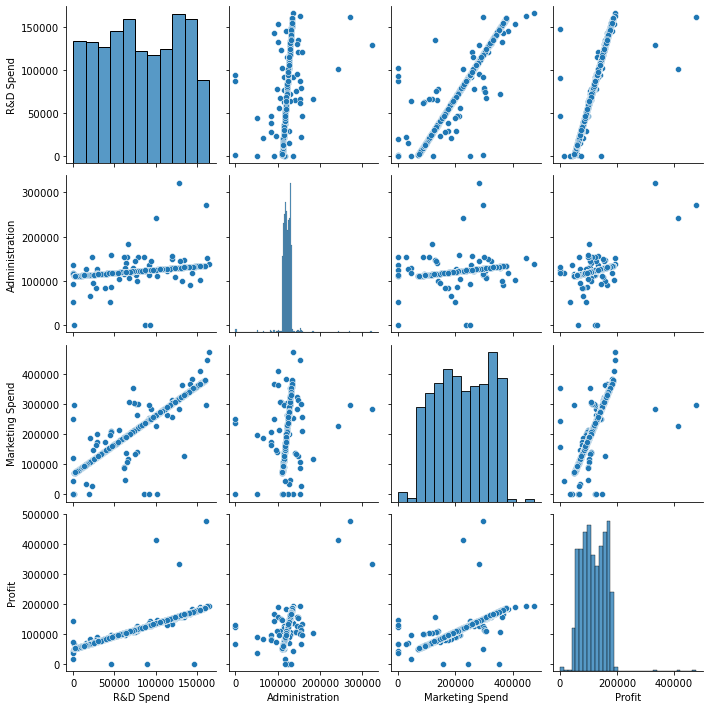

In [12]:
# Visualize the ALL relationships between datasets passing the whole DataFrame.
# Note: For big data sets, filter the column first.
sns.pairplot(df)

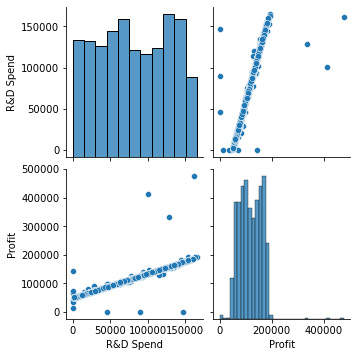

In [13]:
# Closely visualize the relationship between the Feature (R&D Spend) and
# Response (Profit)
sns.pairplot(df[['R&D Spend', 'Profit']])

<AxesSubplot:ylabel='Frequency'>

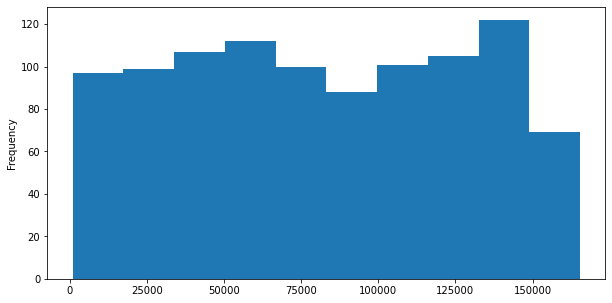

In [16]:
# Visualize histogram plot for the Feature (X)
plt.figure(figsize = (10, 5))
df['R&D Spend'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

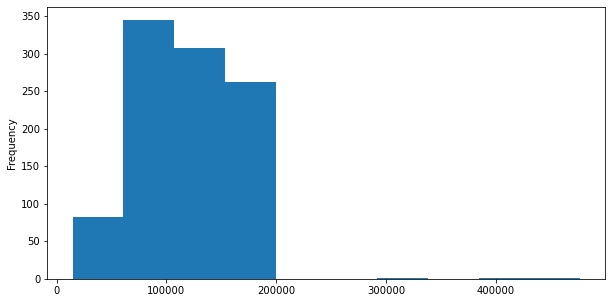

In [17]:
# Visualize histogram for the Resposne (y)
plt.figure(figsize = (10, 5))
df['Profit'].plot(kind='hist')

#### b) Data Cleaning

In [28]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [31]:
# Clean outliers from dataset based on the Response variable (y) = 'Profit'

# Outliers on the lower side of the 'Profit'
q_low = df['Profit'].quantile(0.01)

# Outliers on the higher side of the 'Profit'
q_hi  = df['Profit'].quantile(0.99)

# Filter the outliers from the 'Profit'
df_filtered = df[(df['Profit'] < q_hi) & (df['Profit'] > q_low)]

df_filtered

,R&D Spend,Administration,Marketing Spend,State,Profit
3,144372.41,118671.8500,383199.6200,New York,182901.99000
4,142107.34,91391.7700,366168.4200,Florida,166187.94000
5,131876.90,99814.7100,362861.3600,New York,156991.12000
6,134615.46,147198.8700,127716.8200,California,156122.51000
7,130298.13,145530.0600,323876.6800,Florida,155752.60000
...,...,...,...,...,...
992,105127.00,125982.7298,271621.8728,Florida,138841.98810
993,46798.00,117368.4374,159075.9080,California,89012.02672
994,97209.00,124813.3635,256344.0701,New York,132077.70900
995,54135.00,118451.9990,173232.6695,California,95279.96251


#### c) Data Aggregation

#### d) Data Join / Merge

#### e) Data Scaling - Normalization / Standardization

#### f) Data Conversion - Numerical / Categorical

#### g) Feature Selection - Correlation / Importance

In [40]:
# Investigate correlation between the Feature (X) and Response variable (y).
cor = df[['R&D Spend', 'Profit']].corr()
cor

,R&D Spend,Profit
R&D Spend,1.000000,0.936576
Profit,0.936576,1.000000


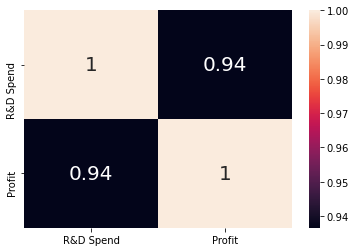

In [41]:
# Investigate correlation in heatmap
hm_cor = sns.heatmap(cor, annot = True, annot_kws = {'size' : 20})

In [37]:
# Select Response variable 'Profit' (y)
y_select = df_filtered.drop(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], axis = 1)
y = y_select.values
y.shape

(980, 1)

In [39]:
# Select Feature variable 'Profit' (X)
X_select = df_filtered.drop(['Administration', 'Marketing Spend', 'State', 'Profit'], axis = 1)
X = X_select.values
X.shape

(980, 1)

#### h) Feature Engineering

### 4. Data Split for Training

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [47]:
# Train and test data shape
print(X_train.shape) # 80% data
print(X_test.shape)  # 20% data
print(y_train.shape) # 80% data
print(y_test.shape)  # 20% data

(784, 1)
(196, 1)
(784, 1)
(196, 1)


### 5. Modelling Data - Build Data Model

In [48]:
# Initialize an instance of Linear Regression model.
lm = LinearRegression(fit_intercept = True)  

In [49]:
# Fit the linear regression model to the data. Use 'X' and then 'y'.
model = lm.fit(X_train, y_train)

In [50]:
# model coeffiencint
model.coef_

array([[0.84797075]])

In [51]:
# model intercept
model.intercept_

array([49592.7043883])

In [52]:
# Ask the model to predict.
# Pass the testing data which has the input values.
y_predictions_test = model.predict(X_test)
y_predictions_train = model.predict(X_train)

In [53]:
# Show test predictions
y_predictions_test [0:10]

array([[ 57492.39988979],
       [143277.36075368],
       [ 96824.67513035],
       [146037.50554301],
       [ 66179.86021748],
       [181603.94268544],
       [175021.14575778],
       [145525.33121036],
       [ 88749.44968373],
       [ 64265.14226531]])

In [54]:
# Show train predictions
y_predictions_train [0:10]

array([[138910.31139423],
       [101838.7261716 ],
       [ 98999.72010258],
       [117893.35637014],
       [ 90803.2348388 ],
       [127599.56027646],
       [ 95284.76024942],
       [152315.03300088],
       [ 99465.256044  ],
       [154348.46685796]])

In [55]:
# Show all test predictions
print(y_predictions_test)
type(y_predictions_test)

[[ 57492.39988979]
 [143277.36075368]
 [ 96824.67513035]
 [146037.50554301]
 [ 66179.86021748]
 [181603.94268544]
 [175021.14575778]
 [145525.33121036]
 [ 88749.44968373]
 [ 64265.14226531]
 [179846.09932191]
 [100090.21048632]
 [ 77484.15827784]
 [ 61861.99316149]
 [ 82470.22628436]
 [166093.70970801]
 [122967.6133346 ]
 [176049.73427681]
 [152064.8816298 ]
 [ 78749.33063596]
 [125660.76843472]
 [139023.93947465]
 [117752.59322574]
 [115955.74320775]
 [137623.09179663]
 [133551.13625797]
 [156253.00916113]
 [157084.02049555]
 [162199.82802673]
 [ 86263.19944646]
 [134903.64960327]
 [169240.52915906]
 [109457.74335503]
 [ 99611.1070129 ]
 [111910.07476232]
 [155561.06502961]
 [136487.65896317]
 [170125.81062145]
 [102902.9294621 ]
 [ 82543.99973956]
 [162870.57288951]
 [151931.75022214]
 [ 86506.56705154]
 [151582.38627339]
 [ 56646.12508188]
 [164731.02071371]
 [105645.26686569]
 [110737.83999834]
 [110335.39308067]
 [ 88299.17721579]
 [118313.1018911 ]
 [167075.65983583]
 [181776.928

numpy.ndarray

### 6. Model Evaluation

In [56]:
# Coeffiencient of determination R^2 of the prediction from sklearn.
# Train data
print('The accuracy of the model on training data set is :', r2_score(y_train, y_predictions_train))

The accuracy of the model on training data set is : 0.9940813831781965


In [57]:
# Coeffiencient of determination R^2 of the prediction from sklearn.
# Test data
print('The accuracy of the model on training data set is :', r2_score(y_test, y_predictions_test))

The accuracy of the model on training data set is : 0.9916072012382324


In [ ]:
#The R Square is measure of how close the data are to the fitted regression line.
# Our model explains 99% of the training data & 99% of the testing data.

In [58]:
print('The RMSE on training data set is :' ,np.sqrt(mean_squared_error(y_train, y_predictions_train)))

The RMSE on training data set is : 3018.8262858784647


In [59]:
print('The RMSE on testing data set is :' ,np.sqrt(mean_squared_error(y_test, y_predictions_test)))

The RMSE on testing data set is : 3421.2069685274478


In [ ]:
# The RMSE is the standard deviation of the residuals. Residuals is 
# the difference between the predicted value and the regression line. 
# Hence RMSE is a measure of how spread your residuals are.

# The Root Mean Squared Error measures the average error the model makes
# in predicting the outcome. Smaller the value of RMSE, better the model is.
# With high numbers, model needs to be improved.

In [60]:
# The mean absolute error (MAE) is the average of all the absolute errors. 
# The absolute error is the difference between the true value (y_train) 
# and the predicted value (y_pred).

# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_predictions_train))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,y_predictions_test))

The MAE  on the training dataset is:  693.9539832147706
The MAE  on the testing dataset is:  614.1184125424641


Text(0.5, 1.0, 'Actual Vs Predicted Values')

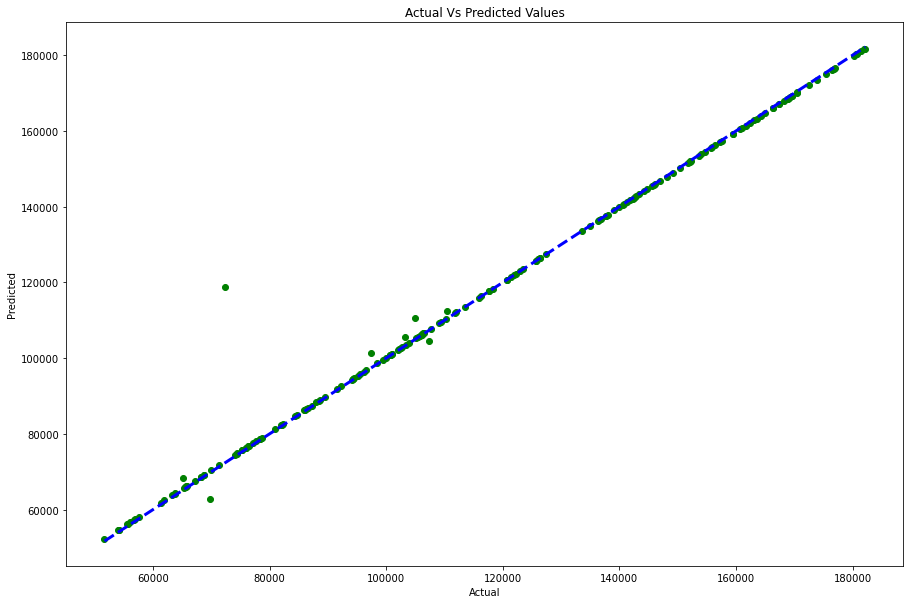

In [61]:
# Visualise train and test data using Scatter plot.
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_predictions_test, c='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', c='blue', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted Values')

C:\Users\Sagewood\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actuals Vs Residuals')

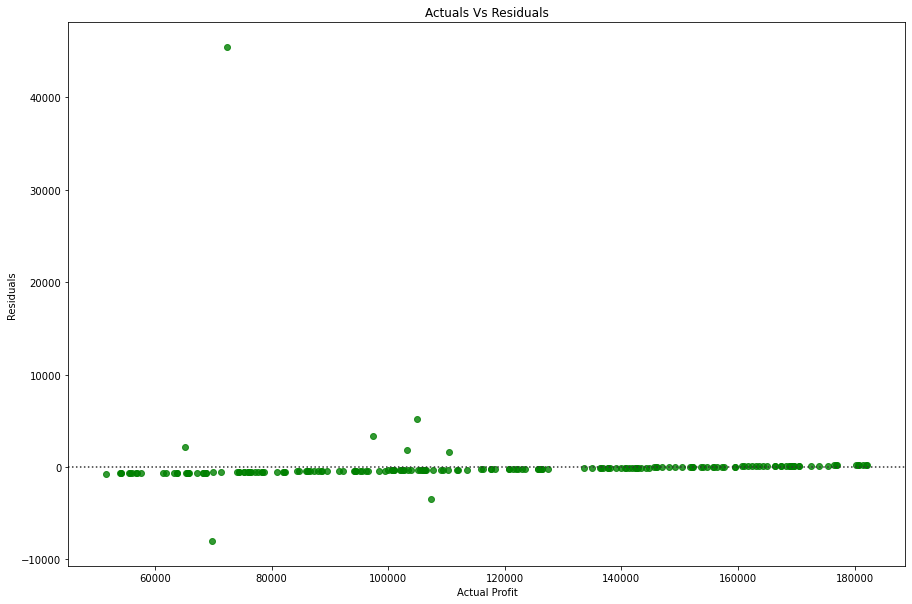

In [62]:
# Plotting Residuals

plt.figure(figsize=(15,10))

sns.residplot(y_test, y_predictions_test, color='green')
plt.xlabel('Actual Profit')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

In [65]:
type(X_test) # Is an array. Pass the column name and convert into DataFrame.

numpy.ndarray

In [72]:
# Create a DataFrame to show actual Vs predicted values of our test data set.
avp_df = pd.DataFrame(X_test, columns = ['R&D Spend'])
avp_df['Profit Actual'] = y_test
avp_df['Profit Predicted'] = y_predictions_test
avp_df['Difference'] = y_test - y_predictions_test

In [73]:
# Show avp_df DataFrame
avp_df[0:20]

,R&D Spend,Profit Actual,Profit Predicted,Difference
0,9316.0,56991.47755,57492.399890,-500.922340
1,110481.0,143415.86410,143277.360754,138.503346
2,55700.0,96616.92850,96824.675130,-207.746630
3,113736.0,146196.58250,146037.505543,159.076957
4,19561.0,65743.69265,66179.860217,-436.167567
5,155679.0,182028.12550,181603.942685,424.182815
6,147916.0,175396.26160,175021.145758,375.115842
7,113132.0,145680.59050,145525.331210,155.259290
8,46177.0,88481.51178,88749.449684,-267.937904
9,17303.0,63814.70273,64265.142265,-450.439535


In [74]:
# Save acutal vs predicted DataFrame to a csv. 'r' is for raw data.
avp_df.to_csv(r'actual_vs_predicted.csv')

### 7. Model Tuning

### 8. Final Model

#### Creating model coefficient DataFrame

In [76]:
# Assigning model coefficient

coef = model.coef_
coef.shape # Do not need reshaping as output is in (1,1) format.


# Creating a Dataframe
coef_df = pd.DataFrame(coef, columns = ['R&D Spend'])


# Displayinng DataFrame
coef_df


,R&D Spend
0,0.847971


#### Creating a function from the model and predicting

In [77]:
# Declaring function features
RD_Spend = 150000

# Regression Formula for pred
# y = a + bx + ..   
# Where y = Profit, a = intercept,  b = Coefficient for R&D Spend and x = R&D Spend
# Prediction Calculator
profit_prediction = (model.intercept_) + (coef_df[['R&D Spend']].values[0] * RD_Spend)

print('The predicted Profit is: ', profit_prediction)

The predicted Profit is:  [176788.31679955]


### 9. Deploy Model